<a href="https://colab.research.google.com/github/AISaturdaysLagos/Cohort8-Johnson-Sirleaf/blob/main/Diabetes_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>AI SATURDAY LAGOS COHORT 8</font></h1>   

<h1 align=center><font size = 5>TEAM JOHNSON-SIRLEAF </font></h1>  
<h2 align=center><font size = 6>MACHINE LEARNING APPROACH TO
PREDICTING DIABETES RISKS</font></h2>

<h5 align=center><font size = 2>Data Source: <a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset" target="_blank">Kaggle.<a/></font></h5>

In [ ]:
# import libraries

import pandas as pd                     # for data manipulation and cleaning

import matplotlib.pyplot as plt         # for data visulization
import seaborn as sns                   # for data visulization
import plotly.express as px             # for data visulization

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading
[Link to the Datasets](https://drive.google.com/file/d/1Fpql6llhkKWCkEwBiv-FDTnhNDX4-MLn/view?usp=drive_link)

In [ ]:
# Read in dataset
D_data =pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv')

In [ ]:
D_data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


### Data Dictionary

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| Gender               | character | Biological sex of the individual  |
| Age                  | numeric   | Age of the individual  |
| Hypertension         | numeric   | 0 = No Hypertension / 1 = Has Hypertension|
| Heart_disease        | numeric   | 0 = No Heart disease / 1 = Has Heart disease|
| Smoking_history      | character | 5 categories i.e not current,former,No Info,current,never and ever |
| bmi                  | numeric   | Body Mass Index, a measure of body fat based on weight and height|
| HbA1c_level          | numeric   | Hemoglobin A1c, a measure of a person's average blood sugar level over the past 2-3 months|
| Blood_glucose_level  | numeric | Amount of glucose in the bloodstream at a given time|
| Diabetes             | numeric | 0 indicates absence of diabetes, 1 indicates presence of Diabetes|



In [ ]:
# check the data types of each features
D_data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
# check the shape of the data
D_data.shape

(100000, 9)

In [ ]:
D_data.isnull().sum()

In [ ]:
D_data.info

### Correcting data types

In [ ]:
# save a copy of the data
D_data_copy = D_data.copy('/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv')

In [ ]:
# Convert age to float data type
D_data['age'] = D_data['age'].astype(int)

D_data.dtypes

gender                  object
age                      int64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
# Checking statistics of the numeric features
D_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Define a list of column names you want to encode
columns_to_encode = ['gender', 'smoking_history']

# Encode each column in the list
for column in columns_to_encode:
    D_data[column + '_encoded'] = label_encoder.fit_transform(D_data[column])



D_data.head(30)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,Female,80,0,1,never,25.19,6.6,140,0,0,4
1,Female,54,0,0,No Info,27.32,6.6,80,0,0,0
2,Male,28,0,0,never,27.32,5.7,158,0,1,4
3,Female,36,0,0,current,23.45,5.0,155,0,0,1
4,Male,76,1,1,current,20.14,4.8,155,0,1,1
5,Female,20,0,0,never,27.32,6.6,85,0,0,4
6,Female,44,0,0,never,19.31,6.5,200,1,0,4
7,Female,79,0,0,No Info,23.86,5.7,85,0,0,0
8,Male,42,0,0,never,33.64,4.8,145,0,1,4
9,Female,32,0,0,never,27.32,5.0,100,0,0,4


In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-9','10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
D_data['Age_Group'] = pd.cut(D_data['age'], bins=bins, labels=labels, right=False)

D_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded,Age_Group
0,Female,80,0,1,never,25.19,6.6,140,0,0,4,80-89
1,Female,54,0,0,No Info,27.32,6.6,80,0,0,0,50-59
2,Male,28,0,0,never,27.32,5.7,158,0,1,4,20-29
3,Female,36,0,0,current,23.45,5.0,155,0,0,1,30-39
4,Male,76,1,1,current,20.14,4.8,155,0,1,1,70-79
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,No Info,27.32,6.2,90,0,0,0,80-89
99996,Female,2,0,0,No Info,17.37,6.5,100,0,0,0,0-9
99997,Male,66,0,0,former,27.83,5.7,155,0,1,3,60-69
99998,Female,24,0,0,never,35.42,4.0,100,0,0,4,20-29


In [ ]:
grouped = D_data.groupby('Age_Group').mean() #to determine the mean of the Age group column

<ipython-input-22-8aba01b937cc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = D_data.groupby('Age_Group').mean() #to determine the mean of the Age group column


# INSIGHTS

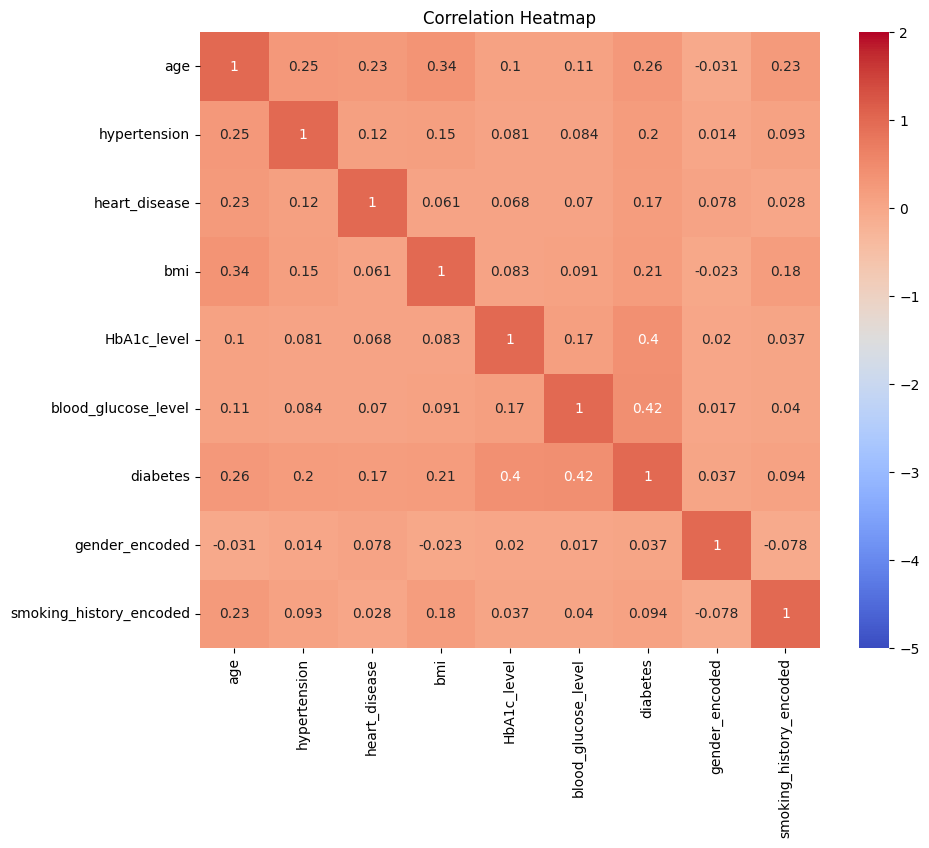

In [ ]:
correlation_matrix = D_data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-5, vmax=2)
plt.title('Correlation Heatmap')
plt.show()

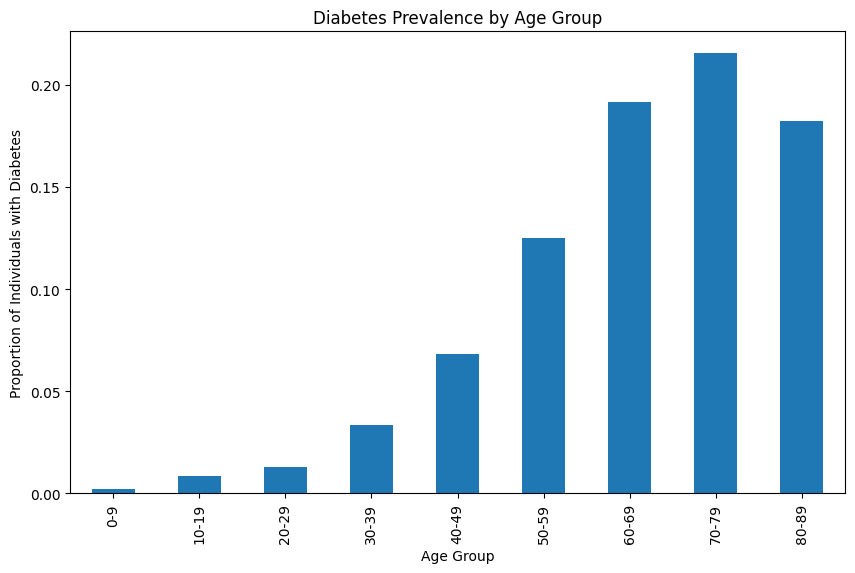

In [ ]:
grouped['diabetes'].plot(kind='bar', figsize=(10,6))
plt.title('Diabetes Prevalence by Age Group')
plt.ylabel('Proportion of Individuals with Diabetes')
plt.xlabel('Age Group')
plt.show()

In [ ]:
ct = pd.crosstab(D_data['gender_encoded'], D_data['diabetes'])

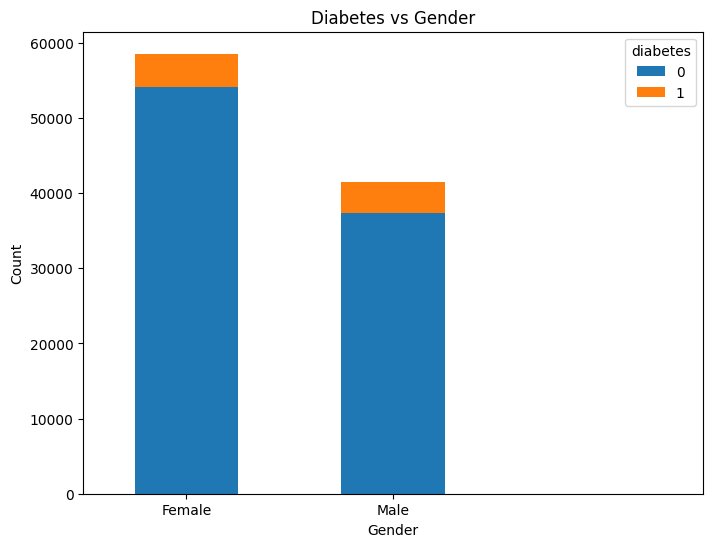

In [ ]:
ct.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Diabetes vs Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

<ipython-input-42-4b8657f77bb6>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, value in row.iteritems():


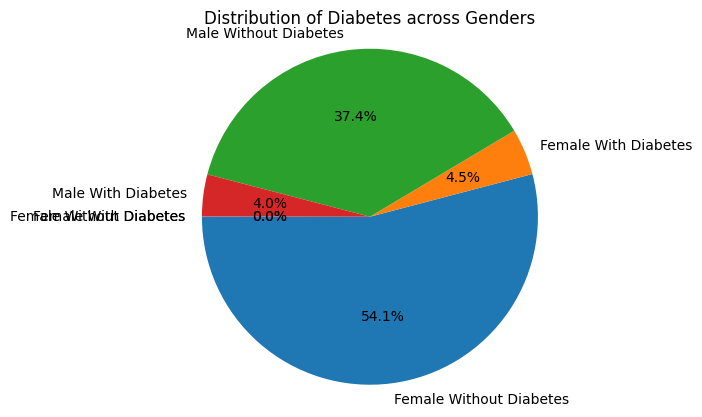

In [ ]:
labels = []
for i, row in ct.iterrows():
    for j, value in row.iteritems():
        gender = 'Male' if i == 1 else 'Female'
        diabetes_status = 'With Diabetes' if j == 1 else 'Without Diabetes'
        labels.append(f"{gender} {diabetes_status}")
fig, ax = plt.subplots()
ax.pie(ct.values.flatten(), labels=labels, autopct='%1.1f%%', startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.title('Distribution of Diabetes across Genders')
plt.show()